In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [3]:
tesla_df = pd.read_csv(r"/content/drive/MyDrive/datasets/Tesla.csv")
tesla_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
tesla_df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [5]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [6]:
tesla_df['Date']= pd.to_datetime(tesla_df['Date'])
tesla_df.set_index('Date', inplace=True)

In [7]:
tesla_df.shape

(1692, 6)

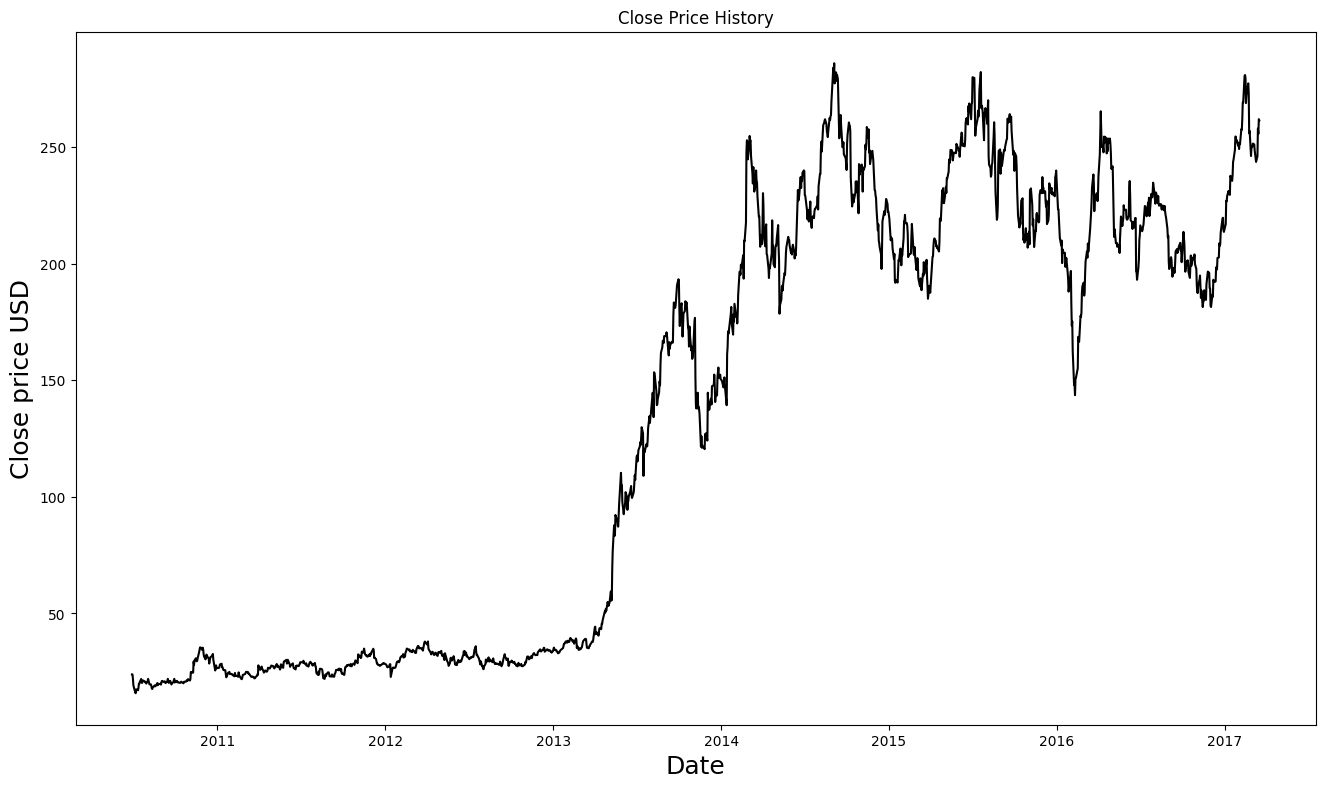

In [8]:
#Plotting the Data

plt.figure(figsize=(16,9))
plt.title('Close Price History')
plt.plot(tesla_df['Close'], color='black')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD', fontsize=18)
plt.show()

In [9]:
# Create a new data frame with only 'Close column'

data = tesla_df.filter(['Close'])
dataset = data.values #converting the data frame into a numpy array
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1354

In [10]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [11]:
#Create the training data
#Create the scaled training data

train_data = scaled_data[0:training_data_len, :]
#splitting the data into x_train and y_train datasets
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
       0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
       0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
       0.01635583, 0.01924215, 0.02031528, 0.01905714, 0.01757696,
       0.01820603, 0.01683689, 0.01531972, 0.01894612, 0.02275755,
       0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234,
       0.00777087, 0.00666075, 0.00932504, 0.01102724, 0.01239639,
       0.01099023, 0.01106424, 0.01221137, 0.01602279, 0.01258141,
       0.0151717 , 0.01461664, 0.01443162, 0.01506069, 0.01361752,
       0.01720693, 0.01946418, 0.01942717, 0.01753997, 0.01887211,
       0.01816903, 0.01617081, 0.01820603, 0.01968621, 0.02286856,
       0.01902013, 0.01639284, 0.01946418, 0.01839106, 0.01506069])]
[0.013913554154743983]



In [12]:
#converting the x_train and y_train into numpy array

x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
#Reshaping the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1294, 60, 1)

In [15]:
#Building the LSTM model

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = True))
model.add(Dense(32))
model.add(Dense(1))

In [16]:
#Compile the Model

model.compile(optimizer='adam', loss = 'mean_squared_error')

In [17]:
#Train the model

model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1294/1294 [==============================] - 52s 36ms/step - loss: 0.0130
Epoch 2/10
1294/1294 [==============================] - 48s 37ms/step - loss: 0.0074
Epoch 3/10
1294/1294 [==============================] - 44s 34ms/step - loss: 0.0067
Epoch 4/10
1294/1294 [==============================] - 46s 35ms/step - loss: 0.0065
Epoch 5/10
1294/1294 [==============================] - 45s 35ms/step - loss: 0.0064
Epoch 6/10
1294/1294 [==============================] - 45s 34ms/step - loss: 0.0064
Epoch 7/10
1294/1294 [==============================] - 44s 34ms/step - loss: 0.0062
Epoch 8/10
1294/1294 [==============================] - 44s 34ms/step - loss: 0.0062
Epoch 9/10
1294/1294 [==============================] - 45s 35ms/step - loss: 0.0061
Epoch 10/10
1294/1294 [==============================] - 58s 45ms/step - loss: 0.0060


In [18]:
#Creating the testing datasets

#Creating a new array containing scale values from index 1543 to 2003
test_data = scaled_data[training_data_len-60:, :]

#Creating the datasets x_test and y_test
x_test=[]
y_test=dataset[training_data_len-60:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i ,0])

In [19]:
#Converting the data into a numpy array
x_test = np.array(x_test)

In [20]:
# Reshaping the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(338, 60, 1)

In [34]:
#Predicting the data

predictions = model.predict(x_test)
predictions = np.reshape(predictions, (predictions.shape[0], predictions.shape[1]))
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 0s 20ms/step


In [38]:
# Getting the root mean sqauare error

rmse = np.sqrt(np.mean((predictions - y_test[-predictions.shape[0]:])**2))
rmse

29.429414007414277

<ipython-input-43-dff207fb8e41>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[:, -1]  # Assigning the last column of predictions


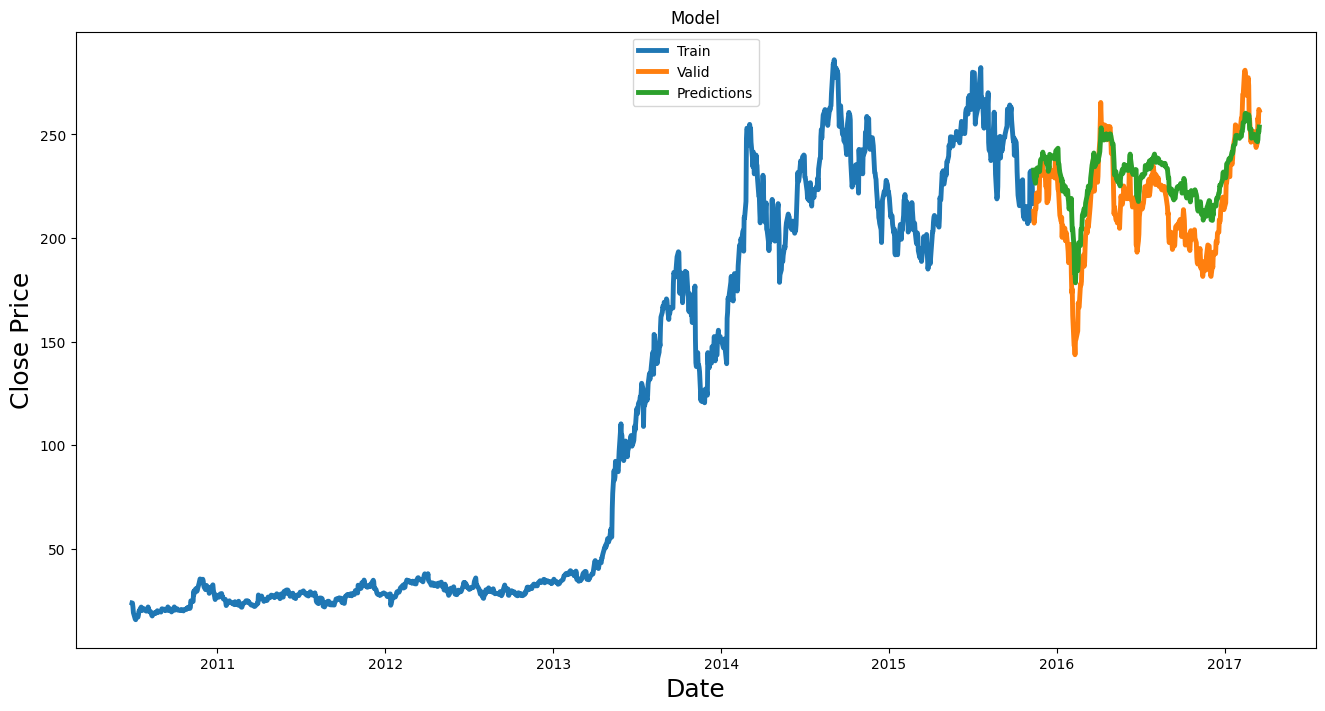

In [43]:
#plotting the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions[:, -1]  # Assigning the last column of predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'], linewidth=3.5)
plt.plot(valid[['Close', 'Predictions']], linewidth=3.5)
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper center')
plt.show()


In [44]:
#showing the valid and predicted price
valid

,Close,Predictions
Date,,
2015-11-12,212.940002,232.772614
2015-11-13,207.190002,229.472153
2015-11-16,214.309998,226.432495
2015-11-17,214.000000,230.171692
2015-11-18,221.070007,229.821320
...,...,...
2017-03-13,246.169998,246.466080
2017-03-14,258.000000,247.392670
2017-03-15,255.729996,251.891144
